In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset=pd.read_csv('/content/drive/MyDrive/AI_SGROUP/Machine_Learning/SVM/svm_sample_classification.csv')
print(dataset)

     Height  Weight  Type
0       176      96     1
1       182      98     1
2       166      62    -1
3       159      53    -1
4       178      66    -1
..      ...     ...   ...
171     158      60    -1
172     173      65    -1
173     178      93     1
174     181      96     1
175     161      88     1

[176 rows x 3 columns]


In [7]:
X=dataset[['Height', 'Weight']]
y=dataset['Type']


In [8]:
def normalize(X):
  X=np.array(X,dtype=float)
  for i in range(X.shape[1]):
    min, max=np.min(X[:,i]), np.max(X[:,i])
    X[:,i]=(X[:,i] -min )/(max-min)
  return X
X=normalize(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

In [10]:
from sklearn.svm import SVC 
svc = SVC(kernel='linear',)
svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

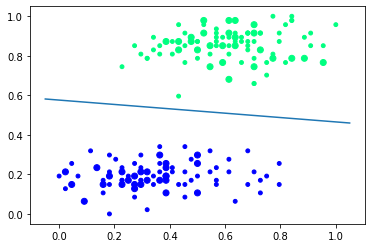

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=15, cmap='winter')
ax=plt.gca()
xlim=ax.get_xlim()
ax.scatter(X_test[:,0], X_test[:,1], c=y_test,cmap="winter", marker='o')
w=svc.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(xlim[0],xlim[1])
yy=a * xx-(svc.intercept_[0] /w[1])
plt.plot(xx,yy)
plt.show()